In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

In [2]:
iris = load_iris()

In [55]:
X = iris.data[:,[1,3]]
y = iris.target

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [66]:
x_train.shape

(105L, 2L)

In [67]:
y_train.shape

(105L,)

In [136]:
clf = SVC(kernel='linear', C=10000)
clf.fit(x_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [80]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

In [137]:
pred = clf.predict(x_test)

In [111]:
x_test[:5]

array([[ 2.8,  2.4],
       [ 2.2,  1. ],
       [ 4.2,  0.2],
       [ 2.9,  1.8],
       [ 3.4,  0.2]])

In [138]:
x0_min, x0_max = min(x_test[:,0])-1, max(x_test[:,0])+1
x1_min, x1_max = min(x_test[:,1])-1, max(x_test[:,1])+1

xx0 = np.arange(x0_min, x0_max, .1)
xx1 = np.arange(x1_min, x1_max, .1)

In [139]:
xx0, xx1 = np.meshgrid(xx0, xx1)

In [140]:
Z = clf.predict(np.array([xx0.ravel(), xx1.ravel()]).T)

In [141]:
Z = Z.reshape(xx0.shape)

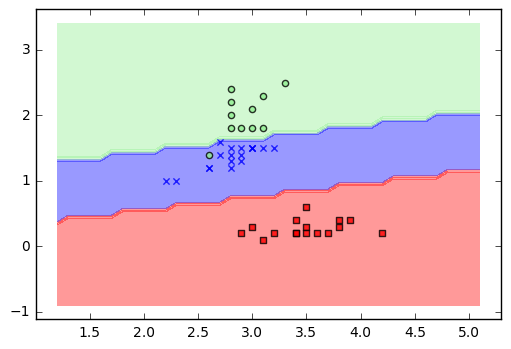

In [142]:
plt.contourf(xx0, xx1, Z, alpha=.4, cmap=cmap )
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test[y_test==cl, 0], y=x_test[y_test==cl, 1],
               alpha=.8, c=cmap(idx), marker=markers[idx], label=cl)